In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('final_merged.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17789 entries, 0 to 17788
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              17789 non-null  object 
 1   thanh_pho         17789 non-null  object 
 2   quan              17524 non-null  object 
 3   kieu              16337 non-null  object 
 4   tieu_de           17785 non-null  object 
 5   dia_chi           17789 non-null  object 
 6   gia_tong_ty       17789 non-null  float64
 7   dien_tich_m2      17789 non-null  float64
 8   phong_ngu_int     13911 non-null  float64
 9   gia_m2_trieu      17782 non-null  float64
 10  chieu_rong_m      7387 non-null   float64
 11  phantram_tang     4428 non-null   float64
 12  tong_quan         17789 non-null  object 
 13  phap_ly_chuan     10232 non-null  object 
 14  vi_do             4563 non-null   float64
 15  kinh_do           4563 non-null   float64
 16  thoi_gian_date    15743 non-null  object

In [3]:
categorical_features = ['thanh_pho','quan', 'phuong', 'duong','kieu','phap_ly_chuan','huong_chuan','noi_that']
numerical_features = ['gia_tong_ty','dien_tich_m2','gia_m2_trieu','chieu_rong_m','phantram_tang','phong_ngu_int','phong_tam_int','so_tang_int','hem_width_m','chieu_dai_m','so_tien_ich_khu_vuc', 'so_tien_ich_noi_khu']
time_series_features = ['thoi_gian_date']
len(categorical_features + numerical_features + time_series_features)

21

In [4]:
def source(val: str):
    if 'batdongsan.com' in val:
        return 'bất động sản'
    elif 'radanhadat.vn' in val:
        return 'rada nhà đất'
    else:
        return 'nhà tốt'

In [5]:
df['source'] = df['link'].apply(lambda x: source(x) if pd.notna(x) else x)
df['so_tien_ich_noi_khu'] = df['tien_ich_noi_khu'].apply(lambda x: len(x.split(';')) if pd.notna(x) else np.nan)
df['so_tien_ich_khu_vuc'] = df['tien_ich_khu_vuc'].apply(lambda x: len(x.split(';')) if pd.notna(x) else np.nan)
df['kieu'] = df['kieu'].apply(lambda x: 'khác' if pd.isna(x) else x)

In [6]:
sns.set(style='whitegrid')

In [7]:
def data_overview(df: pd.DataFrame, num_features, cat_features, time_features):
    print(df[cat_features].describe())
    print(df[num_features].describe())
    print(df[time_features].describe())

In [8]:
data_overview(df,num_features=numerical_features,cat_features=categorical_features,time_features=time_series_features)

          thanh_pho    quan    phuong       duong               kieu  \
count         17789   17524     17486       17208              17789   
unique            3      61       603        2894                 13   
top     hồ chí minh  quận 8  phường 5  phố hà nội  chung cư - căn hộ   
freq           9355    1486       412        3357               7612   

        phap_ly_chuan huong_chuan      noi_that  
count           10232        2054          8259  
unique              6           8             4  
top     sổ đỏ/sổ hồng    đông nam  bàn giao thô  
freq             3940         433          4057  
        gia_tong_ty  dien_tich_m2  gia_m2_trieu  chieu_rong_m  phantram_tang  \
count  1.778900e+04  17789.000000  1.778200e+04   7387.000000    4428.000000   
mean   5.555092e+04    120.113466  1.157745e+06      6.993946      25.214657   
std    7.407826e+06    250.331984  1.543601e+08     18.768282      24.734024   
min    1.000000e-03      1.000000  1.000000e-02      1.000000       0

In [9]:
def plot_missing_ratio(df: pd.DataFrame):
    missing_ratio = df.isna().mean()*100
    missing_df = missing_ratio.reset_index()
    missing_df.columns = ['cot', 'missing_ratio']

    full_data_col = missing_df[missing_df['missing_ratio'] == 0]['cot']
    missing_df = missing_df[missing_df['missing_ratio'] > 0]
    
    plt.figure(figsize=(16, 5))
    ax = sns.barplot(data=missing_df, x='missing_ratio', y='cot', palette='viridis')

    plt.xlabel('Tỉ lệ missing (%)')
    plt.ylabel('Cột')
    plt.title('Tỉ lệ giá trị thiếu theo cột',fontweight='bold')
    plt.tight_layout()
    plt.show()

    return full_data_col

C:\Users\Laptop-HP\AppData\Local\Temp\ipykernel_44516\3213671863.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=missing_df, x='missing_ratio', y='cot', palette='viridis')


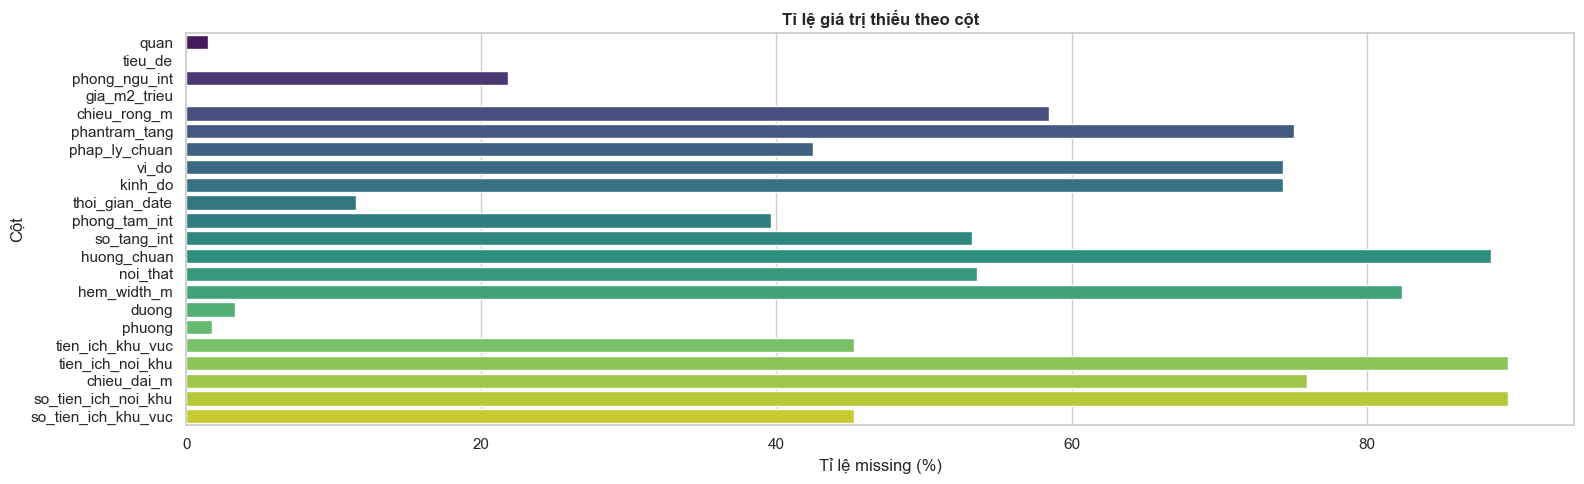

In [10]:
full_data_cot = plot_missing_ratio(df)

In [11]:
full_data_cot

0             link
1        thanh_pho
3             kieu
5          dia_chi
6      gia_tong_ty
7     dien_tich_m2
12       tong_quan
27          source
Name: cot, dtype: object

In [12]:
numerical_features = ['gia_tong_ty',
 'dien_tich_m2',
 'gia_m2_trieu',
 'chieu_rong_m',
 'phantram_tang',
 'phong_ngu_int',
 'phong_tam_int',
 'so_tang_int',
 'hem_width_m',
 'chieu_dai_m',
 'so_tien_ich_khu_vuc',
 'so_tien_ich_noi_khu']

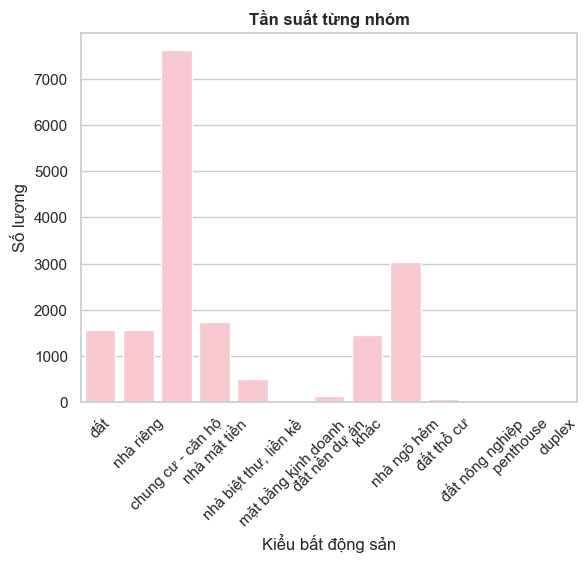

In [13]:
sns.countplot(x='kieu', data=df,color='pink')
plt.xticks(rotation=45)
plt.title("Tần suất từng nhóm",fontweight='bold')
plt.ylabel('Số lượng')
plt.xlabel('Kiểu bất động sản')
plt.show()

In [14]:
def phan_bo_bds(data: pd.DataFrame):
    df = data.copy()
    df['so_luong_kieu'] = df.groupby(['thanh_pho', 'kieu'])['kieu'].transform('count')
    plt.figure(figsize=(16, 7))
    ax = sns.barplot(data=df,x='kieu',y='so_luong_kieu',hue='thanh_pho', palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title('Phân bố các loại bất động sản', fontsize=16, fontweight='bold',color='black')
    plt.xticks(fontweight='bold')
    plt.ylabel('Số lượng', fontsize=14, fontweight='bold')
    plt.xlabel('KIỂU BẤT ĐỘNG SẢN',fontsize=14,fontweight='bold')
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', padding=3, fontsize=9)
    plt.tight_layout()
    plt.show()

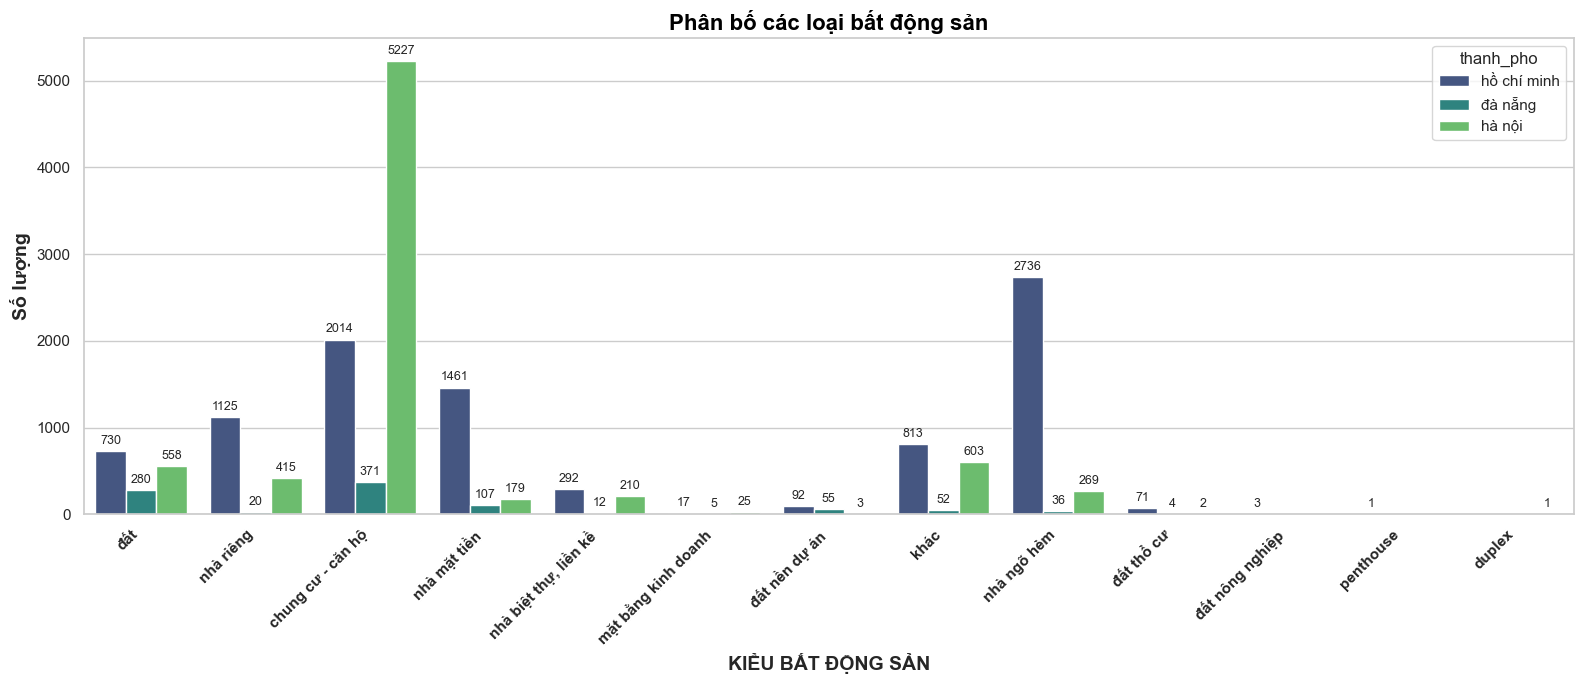

In [15]:
phan_bo_bds(df)

In [16]:
def phantram_kieu_tp(data: pd.DataFrame):
    df = data.copy()
    df_count = df.groupby(['thanh_pho', 'kieu']).size().reset_index(name='so_luong')
    df_count['phan_tram'] = df_count.groupby('thanh_pho')['so_luong'].transform(lambda x: x / x.sum() * 100)
    
    plt.figure(figsize=(16, 7))
    ax = sns.barplot(data=df_count, x='kieu', y='phan_tram', hue='thanh_pho', palette='viridis')

    plt.xticks(rotation=45, ha='right')
    plt.title('Phần trăm các loại bất động sản theo tỉnh thành', fontsize=16, fontweight='bold')
    plt.xlabel('KIỂU BẤT ĐỘNG SẢN', fontsize=14, fontweight='bold')
    plt.ylabel('Tỷ lệ (%)', fontsize=14, fontweight='bold')

    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=9)

    plt.tight_layout()
    plt.show()

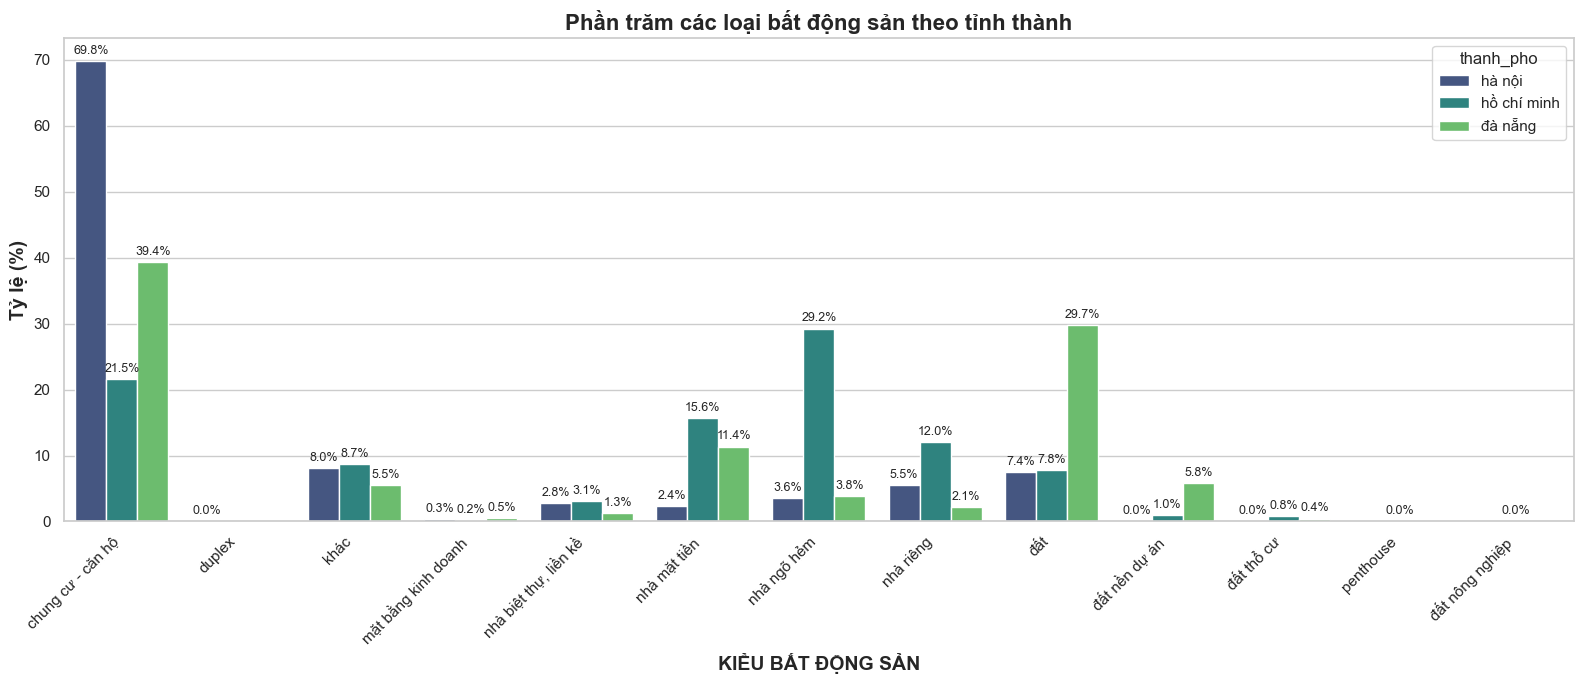

In [17]:
phantram_kieu_tp(df)

In [18]:
def phantram_kieu_tp(data,tp):
    df=data.copy()
    df_tp = df[df['thanh_pho'] == tp]
    df_count = df_tp.groupby('kieu').size().reset_index(name='so_luong')
    plt.figure(figsize=(8,4))
    sns.barplot(data=df_count, x='kieu', y='so_luong',palette='viridis')
    plt.xticks(rotation=45)
    plt.title(tp.upper(), fontweight='bold')
    plt.xlabel('Kiểu bất động sản', fontweight='bold')
    plt.ylabel('Số lượng', fontweight='bold')
    plt.tight_layout()
    plt.show()

C:\Users\Laptop-HP\AppData\Local\Temp\ipykernel_44516\2788432879.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_count, x='kieu', y='so_luong',palette='viridis')


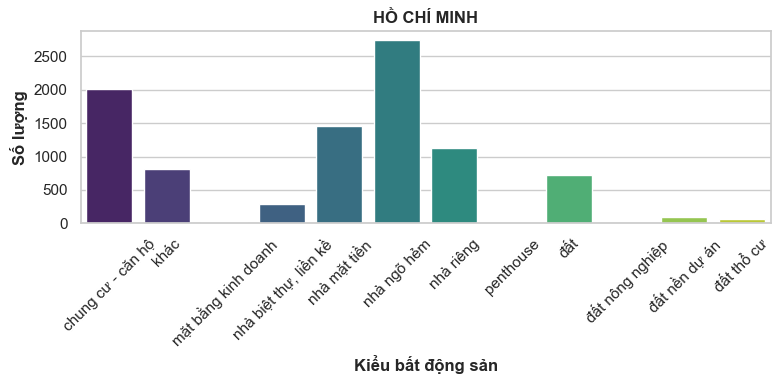

C:\Users\Laptop-HP\AppData\Local\Temp\ipykernel_44516\2788432879.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_count, x='kieu', y='so_luong',palette='viridis')


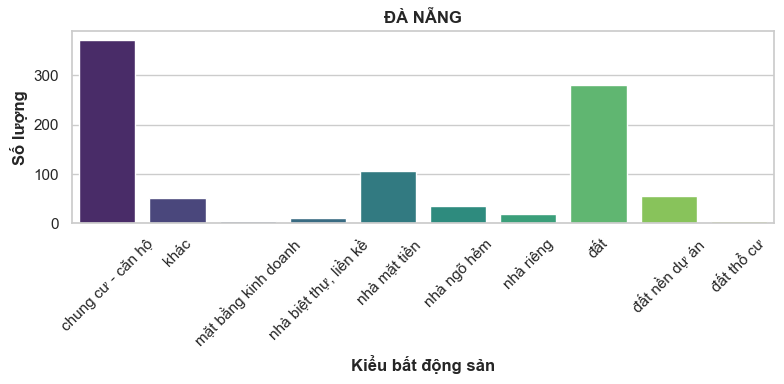

C:\Users\Laptop-HP\AppData\Local\Temp\ipykernel_44516\2788432879.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_count, x='kieu', y='so_luong',palette='viridis')


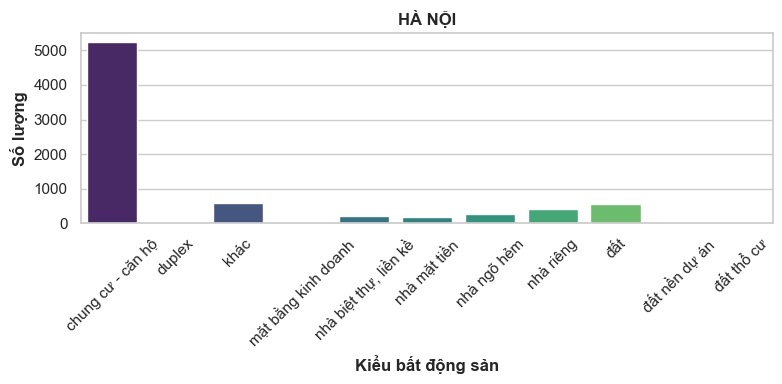

In [19]:
for tp in df['thanh_pho'].unique():
    phantram_kieu_tp(df,tp=tp)

## `*Phân bố bất động sản:*`

- **Ở TPHCM**:
    - Số lượng nhà ngõ hẻm chiếm được đăng tin bán nhiều nhất, tiếp đến là chung cư - căn hộ, nhà mặt tiền, nhà riêng, đất chỉ chiếm hơn 500 mẫu. Mặt bằng kinh doanh, penthouse, đất nông nghiệp rất ít, chỉ có khoảng 1 - 20 mẫu
    - Điều này cũng có thể lí giải vì: 
      - Nhà ngõ hẻm thường có giá thấp hơn nhà mặt tiền hay chung cư cao cấp, phù hợp với khả năng tài chính của nhiều người, đặc biệt là người thu nhập trung bình và thấp.
      - Nhà mặt tiền thường có giá đắt đỏ hơn nhiều so với nhà trong ngõ hoặc chung cư, nên lượng người mua ít hơn. 
      - Đất nông nghiệp ở TPHCM khá hạn chế, phần lớn đã được chuyển đổi mục đích hoặc nằm ở vùng ven, không thuận tiện cho mua bán. 
      - Mặt bằng kinh doanh, penthouse, các loại bất động sản khác là phân khúc rất hẹp và khách hàng mục tiêu rất nhỏ, nên số lượng đăng tin ít.
- **Ở Hà Nội**:
    - Chung cư - căn hộ chiếm lượng lớn tin đăng bán, các loại bất động sản khác không có quá nhiều chênh lệch, mặt bằng kinh doanh, đất nền dự án, đất thổ cư và duplex chiếm 1-30 mẫu, là những loại bất động sản được rao bán ít nhất.
    - Điều này cũng có thể lí giải vì:
      - Đặc thù đô thị đông đúc, phát triển nhanh: Hà Nội là thủ đô, mật độ dân số cao, đất đai hạn chế nên phát triển nhiều chung cư, căn hộ để đáp ứng nhu cầu nhà ở cho người dân.
      - Hà Nội có nhiều loại hình bất động sản đa dạng từ nhà mặt đất, đất thổ cư, nhà phố, mặt bằng kinh doanh, nên tin đăng bán phân tán hơn.
      - Đất nền dự án và duplex là phân khúc cao cấp, khách hàng hạn chế.
      - Mặt bằng kinh doanh có tính đặc thù, nhu cầu mua bán không quá lớn và thường giao dịch ít hơn nhà ở.

- **Ở Đà Nẵng**:
    - Số lượng rao bán chung cư - căn hộ là cao nhất, tiếp đến là đất, cách biệt không quá 100 mẫu, sau đó là mặt tiền, các bất động sản khác không có nhiều chênh lệch.
    - Điều này có thể lí giải vì:
        - Đà Nẵng là thành phố du lịch phát triển nhanh, nhu cầu căn hộ phục vụ cho cả người dân địa phương và khách đầu tư nghỉ dưỡng cao.
        - Đất (đất thổ cư, đất nền) tại Đà Nẵng vẫn được quan tâm nhiều do quỹ đất còn nhiều hơn các đô thị lớn khác, có nhiều dự án phát triển mới.
### KẾT LUẬN:
- Số lượng mẫu có được ở TPHCM là nhiều nhất (9094 mẫu), Hà Nội (7488 mẫu), Đà Nẵng (942 mẫu)
- Các loại bất động sản phân bố đồng đều nhất ở TPHCM, lệch nhất ở Hà Nội
- Trong các loại bất động sản:
  - Nhóm có nhiều mẫu: chung cư - căn hộ.
    - Nhóm này Hà Nội chiếm nhiều nhất
  - Nhóm có mẫu trung bình: nhà ngõ hẻm, nhà mặt tiền, nhà riêng, đất, khác (chưa xác định)
    - Nhóm này TPHCM chiếm nhiều nhất
  - Nhóm có ít mẫu: nhà biệt thự liền kề, đất nền dự án, đất thổ cư, mặt bằng kinh doanh, đất nông nghiệp, penthouse, duplex

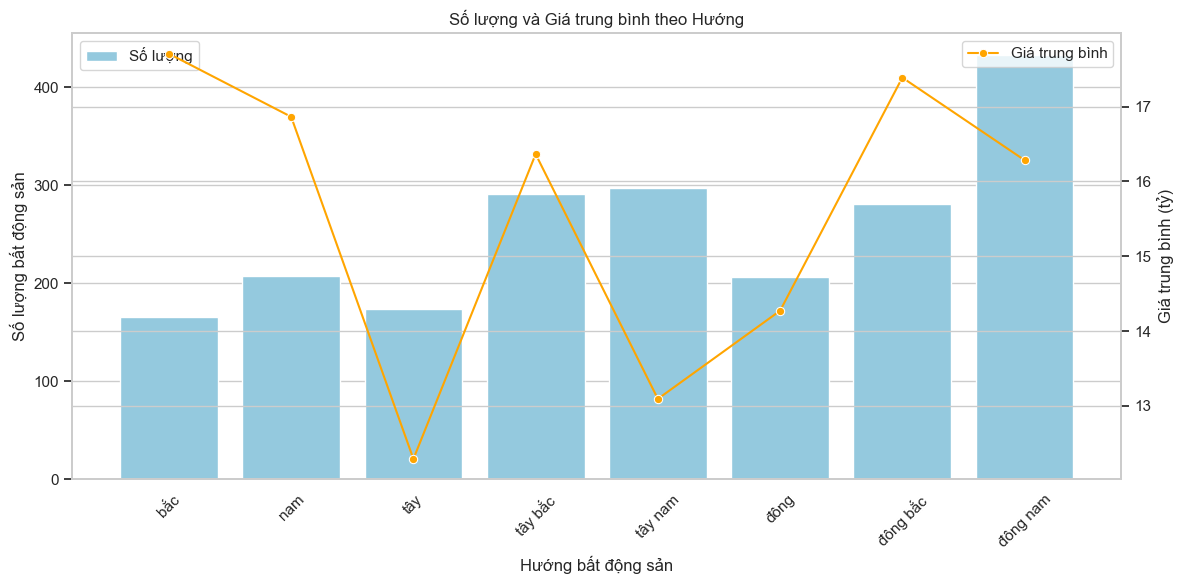

In [20]:
summary = df.groupby('huong_chuan').agg(
    count=('huong_chuan', 'size'),
    mean_price=('gia_tong_ty', 'mean')
).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Trục 1: Barplot số lượng
sns.barplot(data=summary, x='huong_chuan', y='count', ax=ax1, color='skyblue', label='Số lượng')
ax1.set_ylabel('Số lượng bất động sản')
ax1.set_xlabel('Hướng bất động sản')
ax1.tick_params(axis='x', rotation=45)

# Tạo trục thứ 2
ax2 = ax1.twinx()

# Trục 2: Lineplot giá trung bình
sns.lineplot(data=summary, x='huong_chuan', y='mean_price', ax=ax2, color='orange', marker='o', label='Giá trung bình')
ax2.set_ylabel('Giá trung bình (tỷ)')

# Thêm chú thích
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Số lượng và Giá trung bình theo Hướng')
plt.tight_layout()
plt.show()

<Axes: >

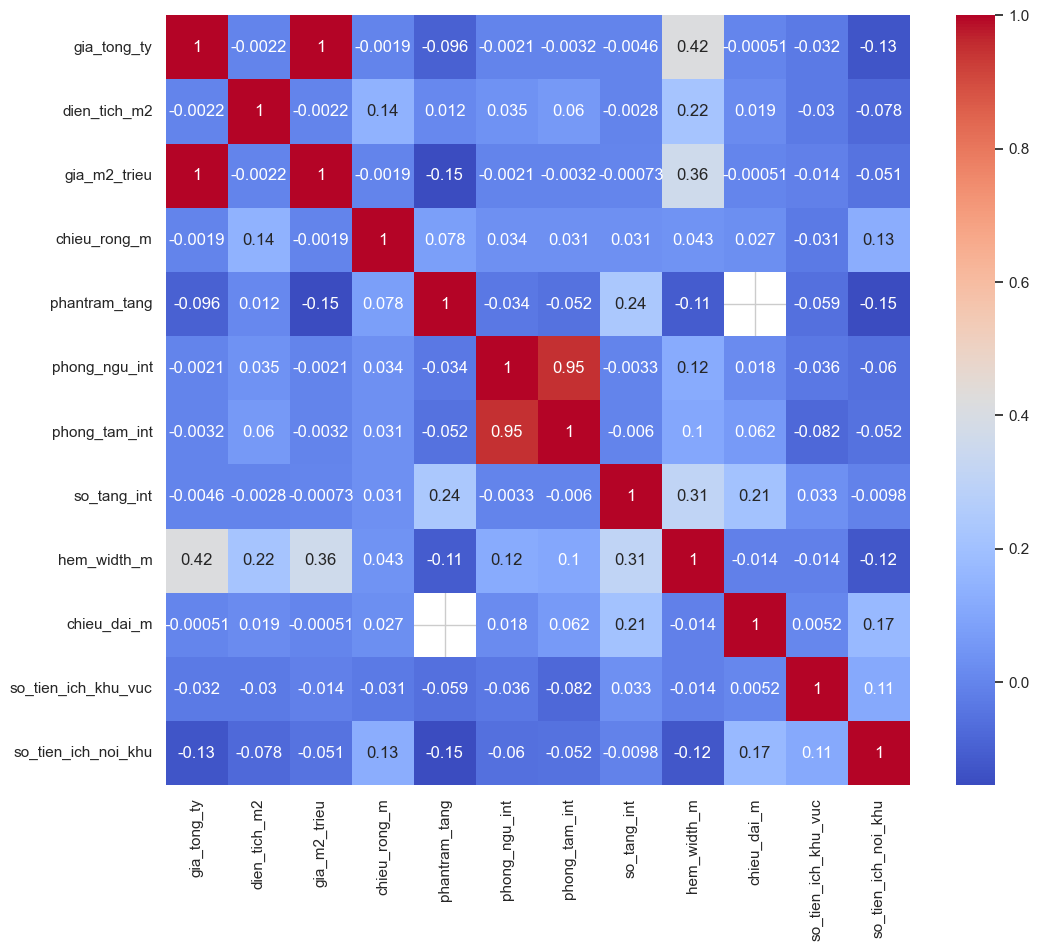

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df[numerical_features].corr(),annot=True,cmap='coolwarm')

In [22]:
def phan_nhom_bds(loai_bds: str) -> str:
    loai_bds = loai_bds.lower().strip()
    # Nhóm Nhà ở
    nha_o = [
        "nhà ngõ hẻm",
        "nhà riêng",
        "nhà mặt tiền",
        "nhà biệt thự",
        "biệt thự",
        "liền kề"
    ]
    # Nhóm Căn hộ / Chung cư
    can_ho = [
        "chung cư",
        "căn hộ",
        "penthouse",
        "duplex"
    ]
    # Nhóm Đất
    dat = [
        "đất",
        "đất nền dự án",
        "đất thổ cư",
        "đất nông nghiệp"
    ]
    # Nhóm Kinh doanh – khai thác thương mại
    kinh_doanh = [
        "mặt bằng kinh doanh",
        "khác"
    ]
    for n in nha_o:
        if n in loai_bds:
            return "nhà ở"
    for c in can_ho:
        if c in loai_bds:
            return "căn hộ"
    for d in dat:
        if d in loai_bds:
            return "đất"
    for k in kinh_doanh:
        if k in loai_bds:
            return "kinh doanh"
    return "khác"

In [23]:
df['nhom_bds'] = df['kieu'].apply(lambda x: phan_nhom_bds(x) if pd.notna(x) else 'khác')
df['nhom_bds'].value_counts()

nhom_bds
căn hộ        7614
nhà ở         6862
đất           1798
kinh doanh    1515
Name: count, dtype: int64

In [24]:
non_features_in_dat = ['phong_ngu_int','phong_tam_int','so_tang_int','noi_that']
mask = df['nhom_bds'].isin(['đất', 'kinh doanh']) & df[non_features_in_dat].notna().any(axis=1)
dt = df.copy()
dt=df[~mask]
df=dt

df['nhom_bds'].value_counts()

nhom_bds
căn hộ        7614
nhà ở         6862
đất           1711
kinh doanh      62
Name: count, dtype: int64

In [25]:
df_dat = df.loc[df['nhom_bds'] == 'đất',:].copy()
df_nha = df.loc[df['nhom_bds'] == 'nhà ở',:].copy()
df_kinhdoanh = df.loc[df['nhom_bds'] == 'kinh doanh',:].copy()
df_canho = df.loc[df['nhom_bds'] == 'căn hộ',:].copy()

In [26]:
not_used_col = ['link','tieu_de','dia_chi','tien_ich_khu_vuc','tien_ich_noi_khu','source','vi_do','kinh_do']

In [27]:
df_dat.drop(columns=non_features_in_dat,inplace=True)
df_dat.drop(columns=not_used_col,inplace=True)
df_dat.drop(columns={'nhom_bds'},inplace=True)
df_nha.drop(columns=not_used_col,inplace=True)
df_canho.drop(columns=not_used_col,inplace=True)
df_nha.drop(columns={'nhom_bds'},inplace=True)
df_canho.drop(columns={'nhom_bds'},inplace=True)

| Cột                   | Số lượng non-null thấp nổi bật           | Hướng giải quyết     |
| --------------------- | ---------------------------------------- | ---------------- |
| `chieu_rong_m`        | Còn 53 (dataset căn hộ) hoặc 1373 (dataset đất) | ⚠️ bỏ ở căn hộ |
| `phantram_tang`       | Rất thiếu ở cả 3 bảng                    | ⚠️ có thể fill theo khu vực vì phantram_tang trên web crawl về là thuộc tính phần trăm tăng của khu vực đó trong 1 năm             |
| `phap_ly_chuan`       | 810/7609 (dataset căn hộ)                     | 🟠 bỏ ở căn hộ            |
| `huong_chuan`         | 319/7609 (dataset căn hộ)                     | ⚠️ bỏ ở căn hộ              |
| `hem_width_m`         | 1/7609 (dataset căn hộ)                       | ❌ hầu như bỏ ở căn hộ    |
| `chieu_dai_m`         | 68/7609 (dataset căn hộ)                      | ❌ bỏ ở căn hộ             |
| `so_tien_ich_noi_khu` | Rất thấp ở tất cả                        | ❌ bỏ/không dùng ở đất, căn hộ |

NÊN KIỂM ĐỊNH

| Loại biến A (missing_col) | Loại biến B (related-col) | Kiểm định      |
| ----------- | ------------------ | -------------- |
| Numerical   | Categorical        | Kruskal-Wallis |
| Categorical | Categorical        | Chi-squared    |
| Categorical | Numerical          | Chia giỏ của numerical rồi dùng Chi-squared cho các nhóm|

In [ ]:
from scipy.stats import chi2_contingency, kruskal
import scipy.stats as stats

In [70]:
def auto_missing_test(df, var, group_col, bins=4, dropna=True):
    print('------ KIỂM ĐỊNH GIẢ THUYẾT ------')
    print(f"H₀: Phân phối của '{var}' KHÔNG khác biệt giữa các nhóm của '{group_col}'")
    print(f"H₁: Phân phối của '{var}' CÓ khác biệt giữa các nhóm của '{group_col}'")

    df = df[[var, group_col]].copy()

    if dropna:
        df = df.dropna()

    # Kiểm tra số nhóm tối thiểu
    if df[group_col].nunique() < 2:
        return f"Không đủ nhóm trong '{group_col}' để kiểm định."

    # Xác định kiểu dữ liệu
    var_is_cat = df[var].dtype == 'object' or df[var].nunique() < 10
    group_is_cat = df[group_col].dtype == 'object' or df[group_col].nunique() < 10

    # Trường hợp 1: Categorical vs Categorical → Chi-squared
    if var_is_cat and group_is_cat:
        contingency = pd.crosstab(df[group_col], df[var])
        if contingency.shape[0] < 2 or contingency.shape[1] < 2:
            return "Không đủ biến thể trong bảng chéo để kiểm định Chi-squared"
        stat, p, _, _ = chi2_contingency(contingency)
        method = "Chi-squared test (cat vs cat)"

    # Trường hợp 2: Numerical vs Categorical → Kruskal-Wallis
    elif not var_is_cat and group_is_cat:
        groups = [subdf[var].values for _, subdf in df.groupby(group_col) if len(subdf) >= 2]
        if len(groups) < 2:
            return "Không đủ nhóm có đủ dữ liệu để kiểm định Kruskal-Wallis"
        stat, p = kruskal(*groups)
        method = "Kruskal-Wallis test (num vs cat)"

    # Trường hợp 3: Categorical vs Numerical → cần chia nhóm group_col
    elif var_is_cat and not group_is_cat:
        try:
            df['__binned__'] = pd.qcut(df[group_col], q=bins, duplicates='drop')
        except ValueError:
            return f"'{group_col}' không đủ giá trị duy nhất để chia nhóm."
        contingency = pd.crosstab(df['__binned__'], df[var])
        if contingency.shape[0] < 2 or contingency.shape[1] < 2:
            return "Không đủ biến thể trong bảng chéo để kiểm định Chi-squared"
        stat, p, _, _ = chi2_contingency(contingency)
        method = "Chi-squared test (cat vs binned num)"

    else:
        return "Cả hai biến đều là numerical → không hỗ trợ kiểm định này ở đây."

    if p < 0.05:
        suggestion = f"Phân phối '{var}' khác biệt rõ giữa các nhóm '{group_col}' → Nên xử lý theo nhóm"
    else:
        suggestion = f"Không có khác biệt rõ ràng → Có thể xử lý toàn cục"

    return {
        'var': var,
        'group_col': group_col,
        'method': method,
        'p_value': round(p, 5),
        'suggestion': suggestion
    }

In [30]:
df.gia_tong_ty.isna().sum()

np.int64(0)

In [31]:
def print_skewness(df: pd.DataFrame):
    numeric_cols = df.select_dtypes('number').columns.tolist()
    for col in numeric_cols:
        print(col, ': ', df[col].skew())

In [32]:
print('-----ĐẤT-----')
print_skewness(df_dat)
print('-----NHÀ-----')
print_skewness(df_nha)
print('-----CĂN HỘ-----')
print_skewness(df_canho)

# data bị lệch phải => ko theo pp chuẩn nên ko dùng ANOVA đc

-----ĐẤT-----
gia_tong_ty :  14.077074289290167
dien_tich_m2 :  14.725974412486766
gia_m2_trieu :  25.45549300601411
chieu_rong_m :  13.445256359873296
phantram_tang :  2.55670340350786
hem_width_m :  4.304427781673465
chieu_dai_m :  4.6295009381704615
so_tien_ich_noi_khu :  1.7281503158383729
so_tien_ich_khu_vuc :  1.2411838607214505
-----NHÀ-----
gia_tong_ty :  82.83718971507355
dien_tich_m2 :  6.840585896329698
phong_ngu_int :  19.021037646648246
gia_m2_trieu :  82.83718969445381
chieu_rong_m :  37.215792473440935
phantram_tang :  1.590882480579405
phong_tam_int :  9.932266400487148
so_tang_int :  4.86057297660308
hem_width_m :  3.5167552419284225
chieu_dai_m :  57.97524547044667
so_tien_ich_noi_khu :  1.0607380003732219
so_tien_ich_khu_vuc :  0.8779199531370063
-----CĂN HỘ-----
gia_tong_ty :  79.27189107216721
dien_tich_m2 :  3.3697668445810414
phong_ngu_int :  48.13071482014843
gia_m2_trieu :  10.124394927204335
chieu_rong_m :  3.5669449168542555
phantram_tang :  3.524265089345388

| Kết quả `p-value` | Kết luận                                                                             |
| ----------------- | ------------------------------------------------------------------------------------ |
| `< 0.05`          | Biến độc lập **có ảnh hưởng đáng kể** biến phụ thuộc                                 |
| `≥ 0.05`          | Biến độc lập **không ảnh hưởng rõ rệt** đến biến phụ thuộc (không có bằng chứng thống kê mạnh) |

Biến `quan` không thiếu quá nhiều nên quyết định sẽ drop những dòng bị NaN

Ở cả 3 dataset, do thời gian crawl là khoảng tháng 4-5 nên số các tin đăng crawl được thường có `thoi_gian_date` vào khoảng tháng 3-4-5 (các tin đăng cũ bị gỡ để không làm loãng web), nên cột `thoi_gian_date`  sẽ fill theo mode

In [71]:
auto_missing_test(df_nha, 'huong_chuan', 'gia_tong_ty')

------ KIỂM ĐỊNH GIẢ THUYẾT ------
H₀: Phân phối của 'huong_chuan' KHÔNG khác biệt giữa các nhóm của 'gia_tong_ty'
H₁: Phân phối của 'huong_chuan' CÓ khác biệt giữa các nhóm của 'gia_tong_ty'


{'var': 'huong_chuan',
 'group_col': 'gia_tong_ty',
 'method': 'Chi-squared test (cat vs binned num)',
 'p_value': np.float64(0.049),
 'suggestion': "Phân phối 'huong_chuan' khác biệt rõ giữa các nhóm 'gia_tong_ty' → Nên xử lý theo nhóm"}

In [72]:
auto_missing_test(df_canho, 'huong_chuan', 'gia_tong_ty')

------ KIỂM ĐỊNH GIẢ THUYẾT ------
H₀: Phân phối của 'huong_chuan' KHÔNG khác biệt giữa các nhóm của 'gia_tong_ty'
H₁: Phân phối của 'huong_chuan' CÓ khác biệt giữa các nhóm của 'gia_tong_ty'


{'var': 'huong_chuan',
 'group_col': 'gia_tong_ty',
 'method': 'Chi-squared test (cat vs binned num)',
 'p_value': np.float64(0.28801),
 'suggestion': 'Không có khác biệt rõ ràng → Có thể xử lý toàn cục'}

Kiểm định trên cho thấy `huong_chuan` có liên quan đáng kế đến giá nhà, đất, điều này khá đúng với thực tế. Tuy nhiên với dataset căn hộ thì `huong_chuan` null rất nhiều (>90%), và thực tế thì khi mua căn hộ người ta sẽ để ý view ban công hơn là hướng. Vì vậy quyết định fillna `huong_chuan` dùng mô hình, cột `huong_chuan` của căn hộ sẽ drop

In [35]:
auto_missing_test(df_dat,'phuong','quan')

------ KIỂM ĐỊNH GIẢ THUYẾT ------
Giả thuyết không (H₀): Biến phuong không liên quan gì đến quan → tức là missing xảy ra "ngẫu nhiên theo biến đó"           
Giả thuyết đối (H₁): Biến phuong có liên quan đến quan → tức là tỉ lệ/giá trị missing khác nhau theo nhóm/giá trị của biến liên quan.


{'missing_col': 'phuong',
 'related_col': 'quan',
 'p_value': np.float64(3e-05),
 'suggestion': "Có liên hệ rõ ràng → Nên fill theo 'quan' hoặc dùng mô hình"}

In [74]:
auto_missing_test(df_nha,'phuong','quan')

------ KIỂM ĐỊNH GIẢ THUYẾT ------
H₀: Phân phối của 'phuong' KHÔNG khác biệt giữa các nhóm của 'quan'
H₁: Phân phối của 'phuong' CÓ khác biệt giữa các nhóm của 'quan'


{'var': 'phuong',
 'group_col': 'quan',
 'method': 'Chi-squared test (cat vs cat)',
 'p_value': np.float64(0.0),
 'suggestion': "Phân phối 'phuong' khác biệt rõ giữa các nhóm 'quan' → Nên xử lý theo nhóm"}

In [75]:
auto_missing_test(df_canho,'phuong','quan')

------ KIỂM ĐỊNH GIẢ THUYẾT ------
H₀: Phân phối của 'phuong' KHÔNG khác biệt giữa các nhóm của 'quan'
H₁: Phân phối của 'phuong' CÓ khác biệt giữa các nhóm của 'quan'


{'var': 'phuong',
 'group_col': 'quan',
 'method': 'Chi-squared test (cat vs cat)',
 'p_value': np.float64(0.0),
 'suggestion': "Phân phối 'phuong' khác biệt rõ giữa các nhóm 'quan' → Nên xử lý theo nhóm"}

Dựa vào kiểm định trên thì `phuong` có quan hệ với `quan`, đúng với thực tế nên sẽ fill `phuong` theo quận

In [76]:
auto_missing_test(df_dat,'duong','quan')

------ KIỂM ĐỊNH GIẢ THUYẾT ------
H₀: Phân phối của 'duong' KHÔNG khác biệt giữa các nhóm của 'quan'
H₁: Phân phối của 'duong' CÓ khác biệt giữa các nhóm của 'quan'


{'var': 'duong',
 'group_col': 'quan',
 'method': 'Chi-squared test (cat vs cat)',
 'p_value': np.float64(0.0),
 'suggestion': "Phân phối 'duong' khác biệt rõ giữa các nhóm 'quan' → Nên xử lý theo nhóm"}

In [77]:
auto_missing_test(df_nha,'duong','quan')

------ KIỂM ĐỊNH GIẢ THUYẾT ------
H₀: Phân phối của 'duong' KHÔNG khác biệt giữa các nhóm của 'quan'
H₁: Phân phối của 'duong' CÓ khác biệt giữa các nhóm của 'quan'


{'var': 'duong',
 'group_col': 'quan',
 'method': 'Chi-squared test (cat vs cat)',
 'p_value': np.float64(0.0),
 'suggestion': "Phân phối 'duong' khác biệt rõ giữa các nhóm 'quan' → Nên xử lý theo nhóm"}

In [78]:
auto_missing_test(df_canho,'duong','quan')

------ KIỂM ĐỊNH GIẢ THUYẾT ------
H₀: Phân phối của 'duong' KHÔNG khác biệt giữa các nhóm của 'quan'
H₁: Phân phối của 'duong' CÓ khác biệt giữa các nhóm của 'quan'


{'var': 'duong',
 'group_col': 'quan',
 'method': 'Chi-squared test (cat vs cat)',
 'p_value': np.float64(0.0),
 'suggestion': "Phân phối 'duong' khác biệt rõ giữa các nhóm 'quan' → Nên xử lý theo nhóm"}

Dựa vào kiểm định trên thì `duong` có liên quan đến `quan`, đúng với thực tế nên sẽ fill dựa trên `quan` ở cả 3 dataset

In [79]:
auto_missing_test(df_dat,'so_tien_ich_khu_vuc','quan')

------ KIỂM ĐỊNH GIẢ THUYẾT ------
H₀: Phân phối của 'so_tien_ich_khu_vuc' KHÔNG khác biệt giữa các nhóm của 'quan'
H₁: Phân phối của 'so_tien_ich_khu_vuc' CÓ khác biệt giữa các nhóm của 'quan'


{'var': 'so_tien_ich_khu_vuc',
 'group_col': 'quan',
 'method': 'Chi-squared test (cat vs cat)',
 'p_value': np.float64(0.08081),
 'suggestion': 'Không có khác biệt rõ ràng → Có thể xử lý toàn cục'}

In [80]:
auto_missing_test(df_dat,'so_tien_ich_khu_vuc','gia_tong_ty')

------ KIỂM ĐỊNH GIẢ THUYẾT ------
H₀: Phân phối của 'so_tien_ich_khu_vuc' KHÔNG khác biệt giữa các nhóm của 'gia_tong_ty'
H₁: Phân phối của 'so_tien_ich_khu_vuc' CÓ khác biệt giữa các nhóm của 'gia_tong_ty'


{'var': 'so_tien_ich_khu_vuc',
 'group_col': 'gia_tong_ty',
 'method': 'Chi-squared test (cat vs binned num)',
 'p_value': np.float64(0.27539),
 'suggestion': 'Không có khác biệt rõ ràng → Có thể xử lý toàn cục'}

In [81]:
auto_missing_test(df_nha,'so_tien_ich_khu_vuc','quan')

------ KIỂM ĐỊNH GIẢ THUYẾT ------
H₀: Phân phối của 'so_tien_ich_khu_vuc' KHÔNG khác biệt giữa các nhóm của 'quan'
H₁: Phân phối của 'so_tien_ich_khu_vuc' CÓ khác biệt giữa các nhóm của 'quan'


{'var': 'so_tien_ich_khu_vuc',
 'group_col': 'quan',
 'method': 'Chi-squared test (cat vs cat)',
 'p_value': np.float64(0.01886),
 'suggestion': "Phân phối 'so_tien_ich_khu_vuc' khác biệt rõ giữa các nhóm 'quan' → Nên xử lý theo nhóm"}

In [83]:
auto_missing_test(df_canho,'so_tien_ich_khu_vuc','quan')

------ KIỂM ĐỊNH GIẢ THUYẾT ------
H₀: Phân phối của 'so_tien_ich_khu_vuc' KHÔNG khác biệt giữa các nhóm của 'quan'
H₁: Phân phối của 'so_tien_ich_khu_vuc' CÓ khác biệt giữa các nhóm của 'quan'


{'var': 'so_tien_ich_khu_vuc',
 'group_col': 'quan',
 'method': 'Chi-squared test (cat vs cat)',
 'p_value': np.float64(0.0),
 'suggestion': "Phân phối 'so_tien_ich_khu_vuc' khác biệt rõ giữa các nhóm 'quan' → Nên xử lý theo nhóm"}

Dựa trên kiểm định, `so_tien_ich_khu_vuc` có liên quan rõ ràng đến `quan` nên nhóm sẽ fill theo mode số tiện ích khu vực của quận

In [86]:
auto_missing_test(df_nha,'phantram_tang','quan')

------ KIỂM ĐỊNH GIẢ THUYẾT ------
H₀: Phân phối của 'phantram_tang' KHÔNG khác biệt giữa các nhóm của 'quan'
H₁: Phân phối của 'phantram_tang' CÓ khác biệt giữa các nhóm của 'quan'


{'var': 'phantram_tang',
 'group_col': 'quan',
 'method': 'Kruskal-Wallis test (num vs cat)',
 'p_value': np.float64(0.0),
 'suggestion': "Phân phối 'phantram_tang' khác biệt rõ giữa các nhóm 'quan' → Nên xử lý theo nhóm"}

In [87]:
auto_missing_test(df_dat,'phantram_tang','quan')

------ KIỂM ĐỊNH GIẢ THUYẾT ------
H₀: Phân phối của 'phantram_tang' KHÔNG khác biệt giữa các nhóm của 'quan'
H₁: Phân phối của 'phantram_tang' CÓ khác biệt giữa các nhóm của 'quan'


{'var': 'phantram_tang',
 'group_col': 'quan',
 'method': 'Kruskal-Wallis test (num vs cat)',
 'p_value': np.float64(0.0),
 'suggestion': "Phân phối 'phantram_tang' khác biệt rõ giữa các nhóm 'quan' → Nên xử lý theo nhóm"}

In [88]:
auto_missing_test(df_canho,'phantram_tang','quan')

------ KIỂM ĐỊNH GIẢ THUYẾT ------
H₀: Phân phối của 'phantram_tang' KHÔNG khác biệt giữa các nhóm của 'quan'
H₁: Phân phối của 'phantram_tang' CÓ khác biệt giữa các nhóm của 'quan'


{'var': 'phantram_tang',
 'group_col': 'quan',
 'method': 'Kruskal-Wallis test (num vs cat)',
 'p_value': np.float64(0.0),
 'suggestion': "Phân phối 'phantram_tang' khác biệt rõ giữa các nhóm 'quan' → Nên xử lý theo nhóm"}

Dựa trên kiểm định, cho thấy `phantram_tang` liên quan rõ ràng đến `quan` nên sẽ fillna theo `quan`

In [89]:
auto_missing_test(df_nha,'phong_ngu_int','kieu')

------ KIỂM ĐỊNH GIẢ THUYẾT ------
H₀: Phân phối của 'phong_ngu_int' KHÔNG khác biệt giữa các nhóm của 'kieu'
H₁: Phân phối của 'phong_ngu_int' CÓ khác biệt giữa các nhóm của 'kieu'


{'var': 'phong_ngu_int',
 'group_col': 'kieu',
 'method': 'Kruskal-Wallis test (num vs cat)',
 'p_value': np.float64(0.0),
 'suggestion': "Phân phối 'phong_ngu_int' khác biệt rõ giữa các nhóm 'kieu' → Nên xử lý theo nhóm"}

In [90]:
auto_missing_test(df_nha,'so_tang_int','kieu')

------ KIỂM ĐỊNH GIẢ THUYẾT ------
H₀: Phân phối của 'so_tang_int' KHÔNG khác biệt giữa các nhóm của 'kieu'
H₁: Phân phối của 'so_tang_int' CÓ khác biệt giữa các nhóm của 'kieu'


{'var': 'so_tang_int',
 'group_col': 'kieu',
 'method': 'Kruskal-Wallis test (num vs cat)',
 'p_value': np.float64(0.0),
 'suggestion': "Phân phối 'so_tang_int' khác biệt rõ giữa các nhóm 'kieu' → Nên xử lý theo nhóm"}

In [94]:
auto_missing_test(df,'so_tien_ich_noi_khu','quan')

------ KIỂM ĐỊNH GIẢ THUYẾT ------
H₀: Phân phối của 'so_tien_ich_noi_khu' KHÔNG khác biệt giữa các nhóm của 'quan'
H₁: Phân phối của 'so_tien_ich_noi_khu' CÓ khác biệt giữa các nhóm của 'quan'


{'var': 'so_tien_ich_noi_khu',
 'group_col': 'quan',
 'method': 'Kruskal-Wallis test (num vs cat)',
 'p_value': np.float64(0.0),
 'suggestion': "Phân phối 'so_tien_ich_noi_khu' khác biệt rõ giữa các nhóm 'quan' → Nên xử lý theo nhóm"}

Dựa trên kiểm định `so_tien_ich_noi_khu` khá liên hệ với `quan`, nhưng nhóm sẽ fillna theo `quan` vì có nhiều quận có mức sống cao thì khi bán bất động sản, tiện ích nội khu sẽ đầy đủ hơn

In [96]:
auto_missing_test(df_nha,'noi_that','gia_tong_ty')

------ KIỂM ĐỊNH GIẢ THUYẾT ------
H₀: Phân phối của 'noi_that' KHÔNG khác biệt giữa các nhóm của 'gia_tong_ty'
H₁: Phân phối của 'noi_that' CÓ khác biệt giữa các nhóm của 'gia_tong_ty'


{'var': 'noi_that',
 'group_col': 'gia_tong_ty',
 'method': 'Chi-squared test (cat vs binned num)',
 'p_value': np.float64(0.0),
 'suggestion': "Phân phối 'noi_that' khác biệt rõ giữa các nhóm 'gia_tong_ty' → Nên xử lý theo nhóm"}

Chú ý nội thất là mức độ hoàn thiện của căn nhà, tiện ích nội khu là khi vào sẽ được cung cấp những nội thất gì, dựa vào kiểm định sẽ fill `noi_that` theo giá

Đối với căn hộ, do có quá nhiều thuộc tính có null trên 80% và trong số đó có những thuộc tính đó theo kiến thức thị trường thì người mua cũng không quá quan tâm nên sẽ drop các thuộc tính đó để mô hình dự đoán chính xác hơn

In [59]:
def boxplot(df: pd.DataFrame, num_col: list[str]):
    n = len(num_col)
    ncols = 4  # Số cột mỗi hàng
    nrows = (n + ncols - 1) // ncols  # Làm tròn lên số hàng

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(num_col):
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_xlabel('')
    
    # Ẩn các ô trống nếu có
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

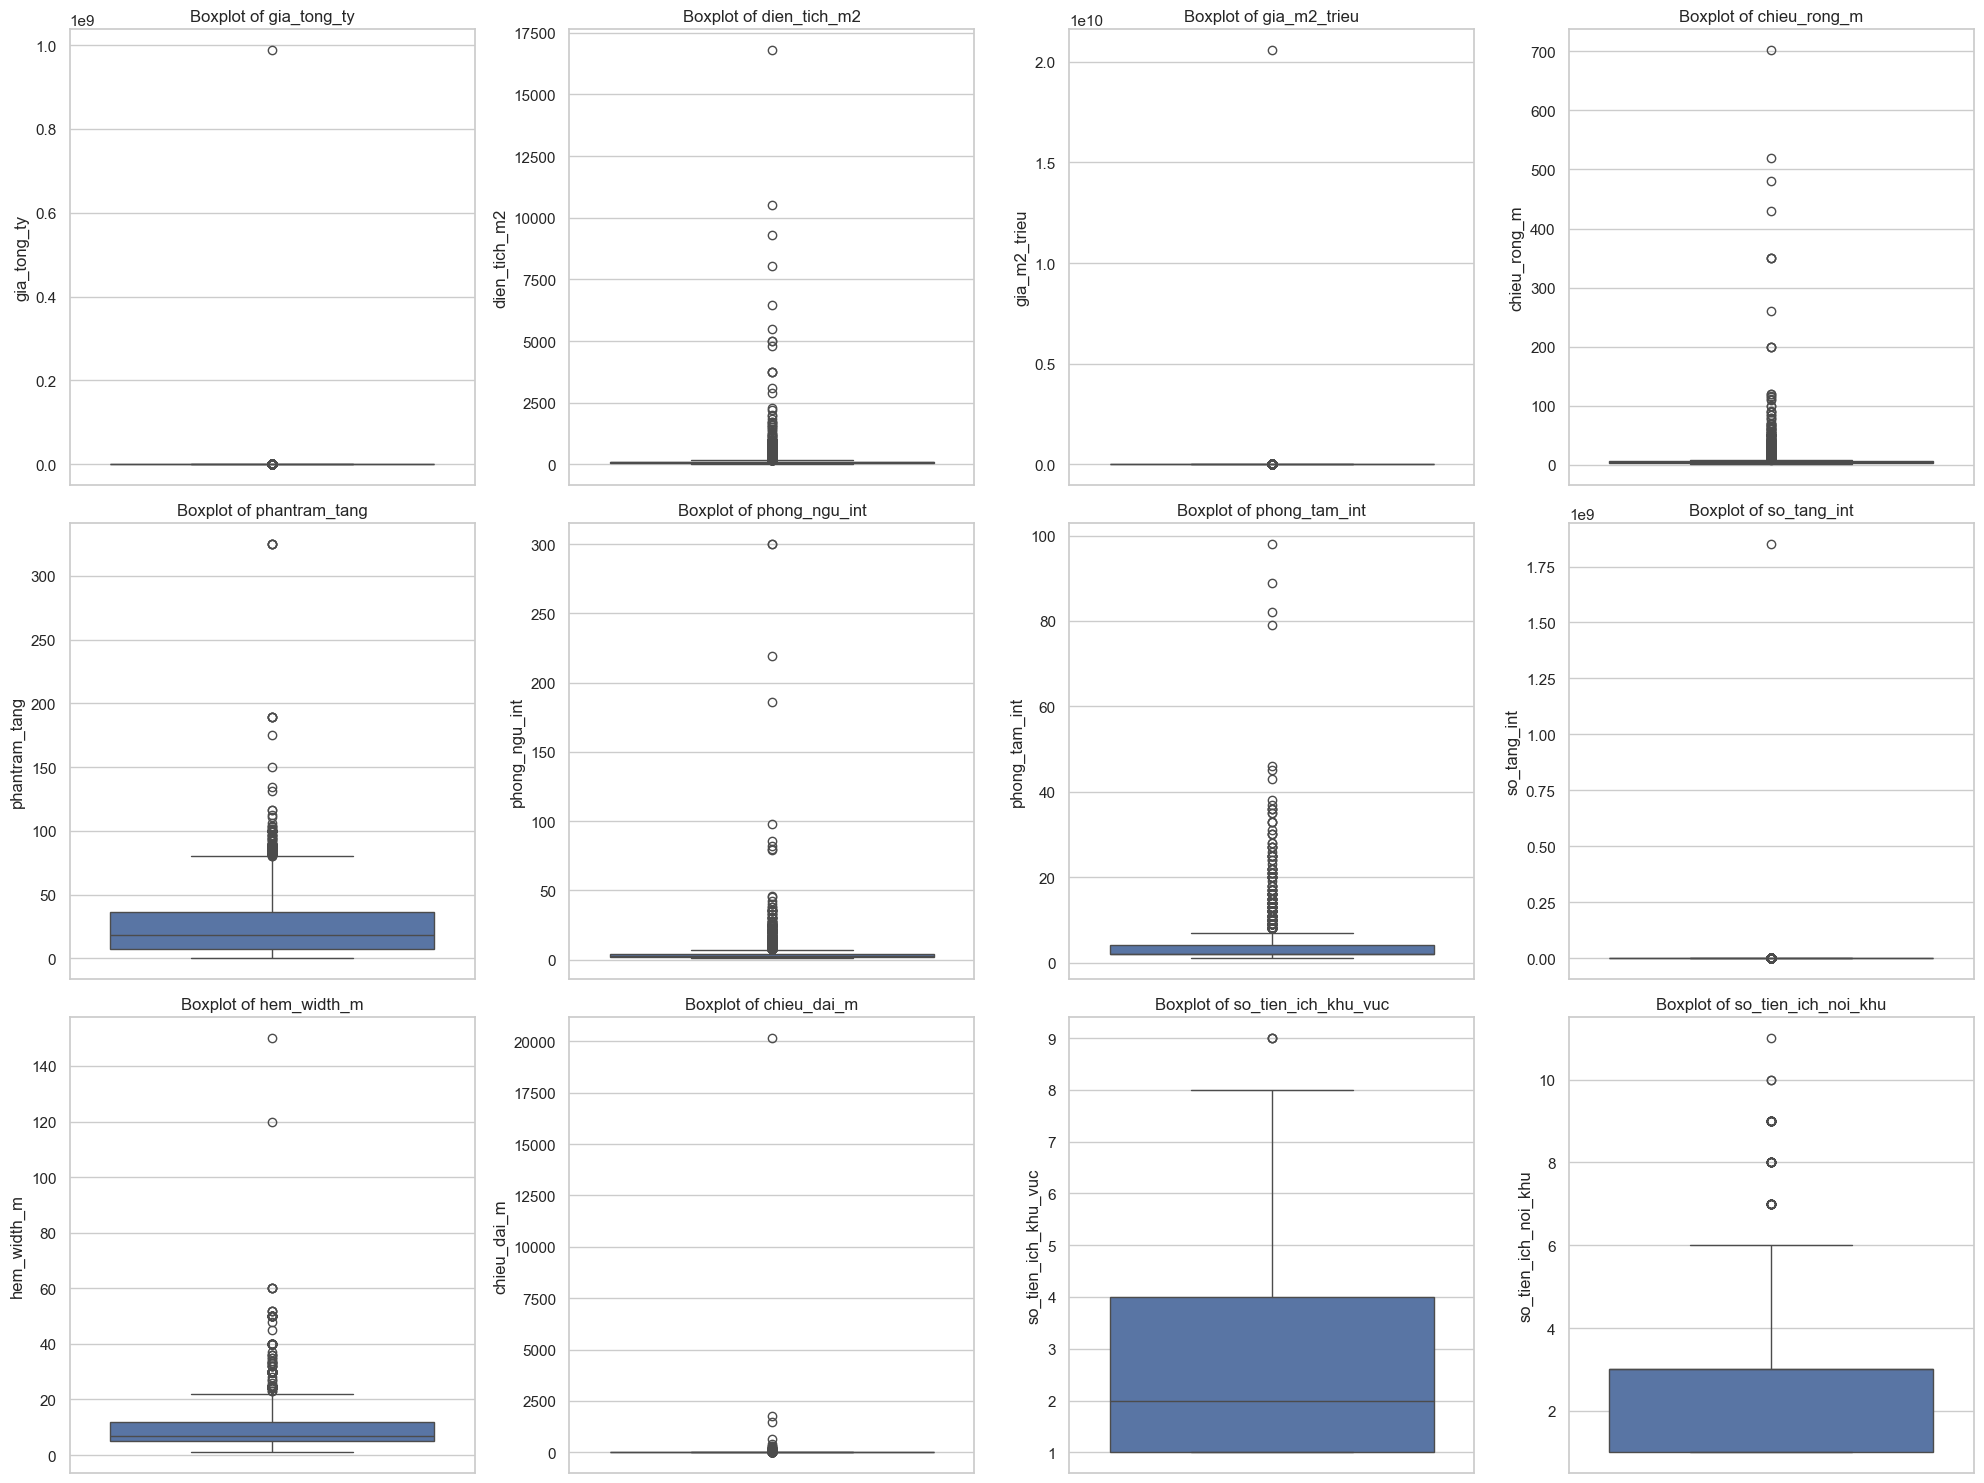

In [60]:
boxplot(df,numerical_features)

hiện data có rất nhiều giá trị ngoại lai cần được xử lý, đặc biệt ở biến mục tiêu: gia_tong_ty

In [61]:
# Phân tích mối quan hệ giữa biến độc lập và biến phụ thuộc:
def scatterplot_numeric_features(data: pd.DataFrame, target_col: str):
    num_features = data.select_dtypes('number').columns.tolist()
    df = data.copy()
    num_plots = len(num_features)
    nrows, ncols = 4, 3
    total_subplots = nrows * ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 9))
    axes = axes.flatten()

    for i, col in enumerate(num_features[:total_subplots]):
        sns.scatterplot(data=df, x=col, y=target_col, ax=axes[i], color='steelblue', alpha=0.6,hue='kieu')
        axes[i].set_title(f"{col} vs {target_col}", fontsize=10,fontweight='bold',color='red')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target_col)

    for j in range(num_plots, total_subplots):
        fig.delaxes(axes[j])

    fig.suptitle(f"Scatterplot mối quan hệ với {target_col}", fontsize=16,fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

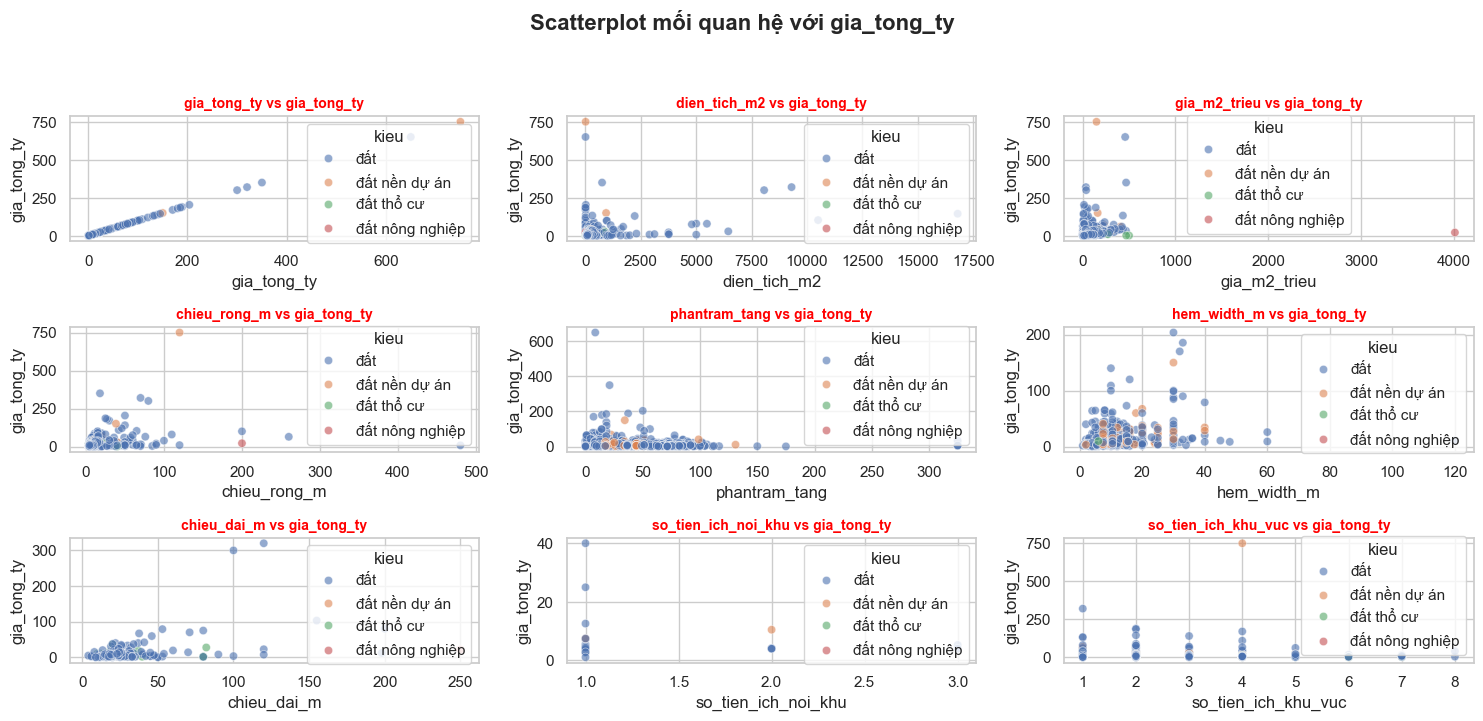

In [62]:
scatterplot_numeric_features(df_dat,'gia_tong_ty')

#### Biến có mối quan hệ tương đối rõ với gia_tong_ty
1. dien_tich_m2 và log_dien_tich_m2

Có xu hướng tăng giá trị theo diện tích, dù hơi phân tán.

Biểu đồ log rõ hơn → nên giữ lại phiên bản log_dien_tich_m2 khi modeling.

2. log_gia_tong_ty

Đường chéo xuất hiện rõ → xác nhận log-transform có hiệu quả giảm độ lệch.

3. log_gia_m2_trieu

Mối quan hệ tuyến tính nhẹ → có thể dùng thêm để phản ánh hiệu suất giá trên diện tích.

#### Biến có xu hướng yếu hoặc bị nhiễu
4. gia_m2_trieu

Một số điểm có giá trị rất cao → cần kiểm tra outlier hoặc sai đơn vị.

Phân tán nhiều, không rõ xu hướng tăng.

5. chieu_dai_m và chieu_rong_m

Xu hướng không rõ ràng, dữ liệu phân tán mạnh.

Có vài điểm quá lớn bất thường (chiều dài 250m, chiều rộng 500m) → nên cap giá trị hoặc xác minh lại.

6. phantram_tang

Không có xu hướng rõ ràng với gia_tong_ty.

Với loại hình đất, thông tin tầng có thể không mang nhiều ý nghĩa.

#### Biến gần như không đóng góp thông tin hữu ích
7. hem_width_m

Phần lớn điểm tập trung dưới 20m, không có xu hướng gì đặc biệt.

Cân nhắc loại bỏ.

8. so_tien_ich_noi_khu, so_tien_ich_khu_vuc

Biến có quá ít giá trị, giá trị lặp lại nhiều.

Không có tương quan rõ với giá → không nên dùng trực tiếp.



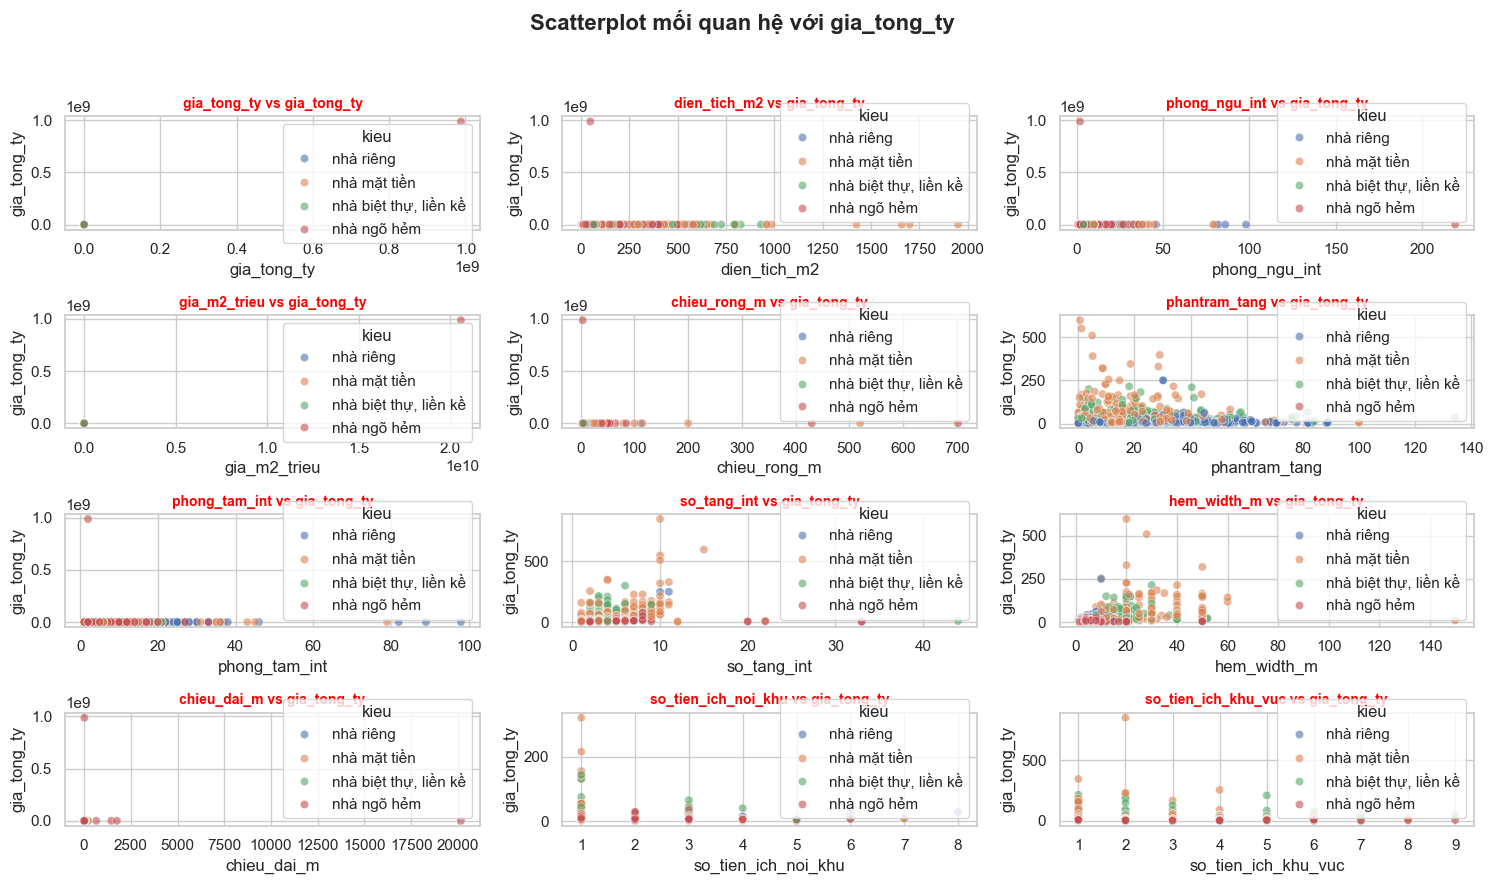

In [63]:
scatterplot_numeric_features(df_nha,'gia_tong_ty')

#### Biến có mối quan hệ khá rõ với gia_tong_ty
1. dien_tich_m2:

Xu hướng càng lớn thì giá càng cao là khá rõ.

Tuy nhiên có một số outlier về diện tích (trên 1500 m²) không đi kèm giá tăng tương ứng → cần kiểm tra.

2. chieu_dai_m:

Có xu hướng tương tự như diện tích.

Nhưng lại có vài điểm bất thường như chiều dài > 10,000 m → chắc chắn là nhập sai hoặc lỗi đơn vị.

3. phantram_tang:

Có dạng hình parabol mở ngang – phân tán nhưng có vẻ ở tầm trung (~20–60) thì giá cao hơn.

Có thể là proxy cho số tầng/độ cao của căn nhà → phù hợp nếu dùng cho model phi tuyến hoặc binning.

#### Biến có tương quan yếu hoặc bị nhiễu
4. chieu_rong_m:

Hầu hết dữ liệu nằm dưới 100m, nhưng có những outlier đến 700m → ảnh hưởng trực quan.

Tương quan không rõ ràng.

5. phong_ngu_int, phong_tam_int:

Giá trị phòng ngủ/phòng tắm khá cao (nhiều điểm >50 thậm chí 100) → cần nghi ngờ nhập sai.

Không thấy xu hướng tăng rõ ràng theo số lượng phòng.

6. so_tien_ich_noi_khu, so_tien_ich_khu_vuc:

Có vẻ như những căn nhà có nhiều tiện ích thì có khả năng giá cao hơn, nhưng sự phân tán rất lớn.

Có thể thử gộp lại theo nhóm (ít – vừa – nhiều tiện ích) để rõ hơn mối quan hệ.

#### Biến có dấu hiệu dữ liệu sai hoặc không dùng được trực tiếp

7. gia_m2_trieu:

Có điểm > 10 tỷ/m² là bất hợp lý với nhà ở Việt Nam → cần kiểm tra đơn vị hoặc chia sai.

Trông giống outlier cực mạnh → nên log-transform hoặc kiểm tra lại công thức tính.

8. so_tang_int:

Có xu hướng cụm giá cao xuất hiện với số tầng lớn, nhưng cũng có những điểm rất bất thường (tầng lên tới ~50).

Tạm thời giữ nhưng cần cap hoặc scale lại.

9. hem_width_m:
Dữ liệu khá tập trung ở mức dưới 20m, nhiều điểm lặp → không có xu hướng rõ.

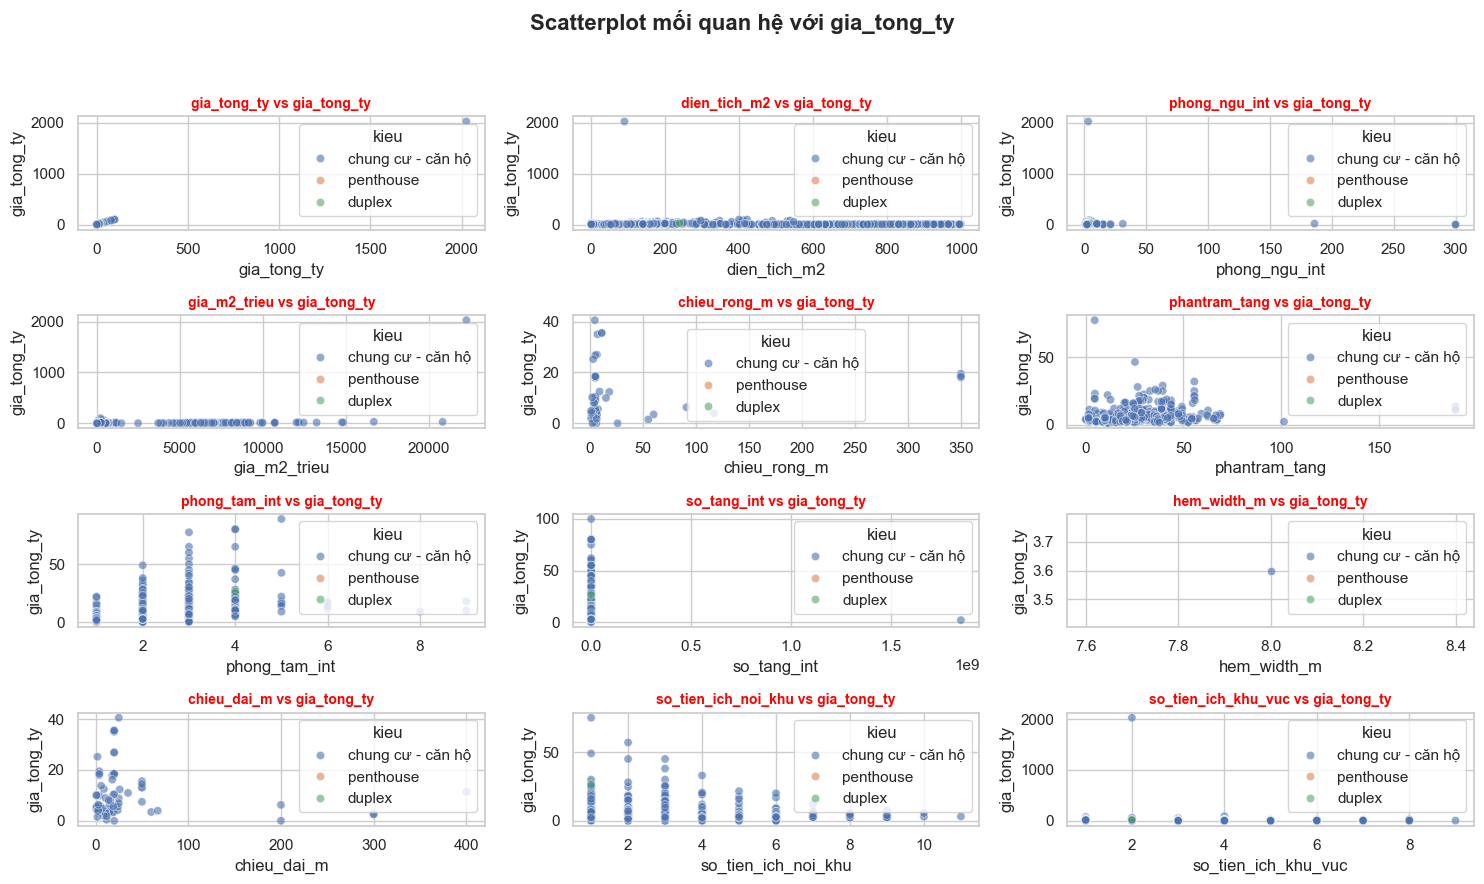

In [64]:
scatterplot_numeric_features(df_canho,'gia_tong_ty')

#### Biến có tương quan tương đối rõ với gia_tong_ty:
dien_tich_m2 (diện tích m²):

- Nhìn chung có xu hướng tăng cùng với gia_tong_ty.

- Tuy nhiên xuất hiện một số điểm outlier ở diện tích rất lớn.

gia_m2_trieu (giá theo mét vuông):

- Phân tán mạnh, nhưng có xu hướng tăng theo chiều dọc.

- Có thể bị ảnh hưởng bởi outlier → cần xử lý hoặc log-transform thêm.

chieu_dai_m:

- Có xu hướng tăng nhẹ nhưng mối tương quan không rõ ràng lắm.

- Một số điểm rất dài nhưng giá không tăng tương ứng → cần kiểm tra outlier.

#### Biến có mối liên hệ yếu hoặc bị nhiễu do outlier:
phong_ngu_int:

- Nhiều điểm nằm sát trục tung và vài điểm lệch quá lớn (có thể là sai số nhập liệu?).

- Mối quan hệ khó nhận diện vì có giá trị bất thường (phòng ngủ lên tới gần 300?).

chieu_rong_m:

- Tập trung phần lớn ở phía dưới 50m, vài điểm >200m → có thể là ngoại lai.

- Dữ liệu bị bóp méo do outlier.

phong_tam_int:

- Phân tán khá lớn.

- Xu hướng tăng theo số phòng tắm có vẻ có, nhưng không rõ ràng.

phantram_tang:

- Hầu hết dữ liệu tập trung ở khoảng nhỏ.

- Có vài điểm outlier làm khó quan sát xu hướng.

- so_tien_ich_noi_khu, so_tien_ich_khu_vuc:

- Có vẻ hơi rời rạc, không thể hiện rõ mối quan hệ tuyến tính.

- Có thể cần chuyển thành categorical hoặc count-based để phân tích thêm.

Biến có khả năng sai lệch nghiêm trọng hoặc outlier quá lớn:
so_tang_int:

- Có một số điểm với giá trị tầng lên tới hàng tỷ, không hợp lý → sai dữ liệu.

Nên xử lý hoặc kiểm tra kỹ càng trước khi sử dụng.

- hem_width_m:

Hầu hết dữ liệu nằm trong một khoảng hẹp (~7.6–8.4) → khó rút ra xu hướng.

Phân bố không đủ đa dạng.

In [65]:
numerical_features

['gia_tong_ty',
 'dien_tich_m2',
 'gia_m2_trieu',
 'chieu_rong_m',
 'phantram_tang',
 'phong_ngu_int',
 'phong_tam_int',
 'so_tang_int',
 'hem_width_m',
 'chieu_dai_m',
 'so_tien_ich_khu_vuc',
 'so_tien_ich_noi_khu']

In [66]:
df[numerical_features].corr()

,gia_tong_ty,dien_tich_m2,gia_m2_trieu,chieu_rong_m,phantram_tang,phong_ngu_int,phong_tam_int,so_tang_int,hem_width_m,chieu_dai_m,so_tien_ich_khu_vuc,so_tien_ich_noi_khu
gia_tong_ty,1.000000,-0.002231,1.000000,-0.002009,-0.097596,-0.002236,-0.003451,-0.004812,0.424633,-0.000511,-0.033288,-0.137513
dien_tich_m2,-0.002231,1.000000,-0.002229,0.160547,0.013587,0.029145,0.049097,-0.002867,0.223875,0.018990,-0.030970,-0.081558
gia_m2_trieu,1.000000,-0.002229,1.000000,-0.002004,-0.156711,-0.002237,-0.003451,-0.000745,0.368240,-0.000510,-0.011257,-0.053023
chieu_rong_m,-0.002009,0.160547,-0.002004,1.000000,0.078206,0.024110,0.031539,0.011889,0.043446,0.027234,-0.029427,0.135900
phantram_tang,-0.097596,0.013587,-0.156711,0.078206,1.000000,-0.035660,-0.053680,0.243378,-0.110611,NaN,-0.057423,-0.153990
phong_ngu_int,-0.002236,0.029145,-0.002237,0.024110,-0.035660,1.000000,0.948831,-0.003461,0.127266,0.033716,-0.036876,-0.069446
phong_tam_int,-0.003451,0.049097,-0.003451,0.031539,-0.053680,0.948831,1.000000,-0.006286,0.111241,0.069763,-0.086609,-0.060163
so_tang_int,-0.004812,-0.002867,-0.000745,0.011889,0.243378,-0.003461,-0.006286,1.000000,0.319243,0.021509,0.033892,-0.010871
hem_width_m,0.424633,0.223875,0.368240,0.043446,-0.110611,0.127266,0.111241,0.319243,1.000000,-0.014254,-0.009424,-0.106140
chieu_dai_m,-0.000511,0.018990,-0.000510,0.027234,NaN,0.033716,0.069763,0.021509,-0.014254,1.000000,0.004590,0.174803


<Axes: >

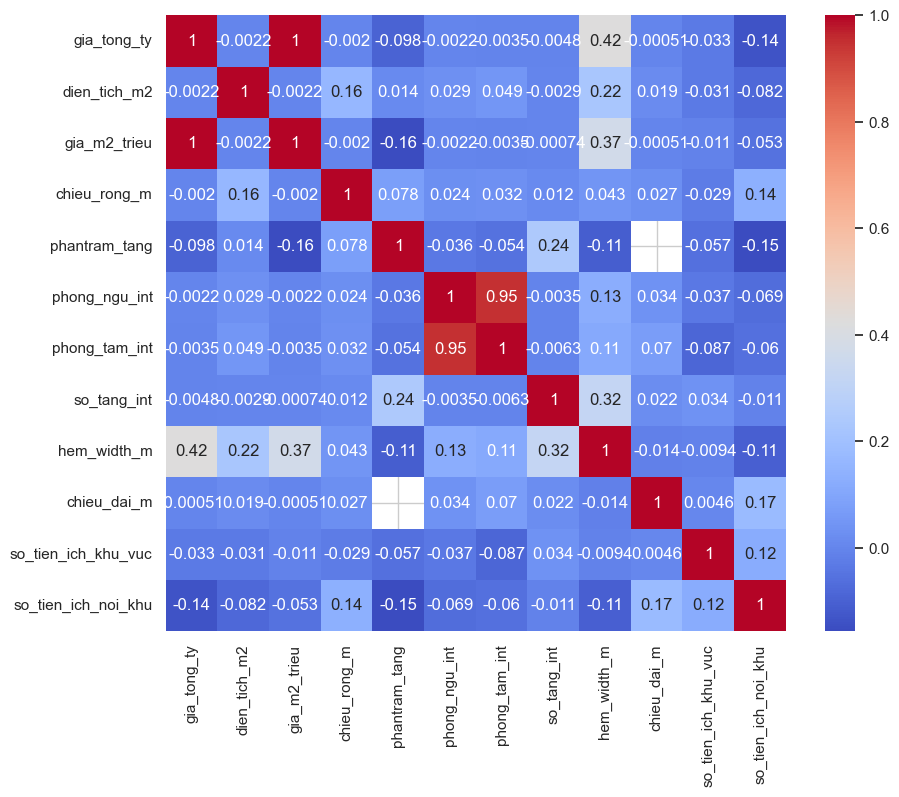

In [67]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_features].corr(),annot=True,cmap='coolwarm')

| Biến            | Hệ số tương quan | Nhận xét                                                                          |
| --------------- | ---------------- | --------------------------------------------------------------------------------- |
| `dien_tich_m2`  | **0.22**    | Có tương quan dương nhẹ, hợp lý vì diện tích tăng thì giá tổng thường tăng.       |
| `hem_width_m`   | **0.42**      | Tương quan ***trung bình***, đáng chú ý. Hẻm rộng có thể tăng giá trị bất động sản. |
| `so_tang_int`   | **0.29**   | Càng nhiều tầng thì giá tổng càng cao. Khá hợp lý                        |
| `phong_tam_int` | **0.35**     | Số phòng tắm có ảnh hưởng đến giá, thể hiện qua tương quan tương đối mạnh.        |
| `phong_ngu_int` | **0.22**         | Có ảnh hưởng nhẹ, phù hợp với kỳ vọng.                                            |


| Biến                          | Hệ số        | Nhận xét                |
| ----------------------------- | ------------ | --------------------------------------------------------------------------------------------- |
| `gia_m2_trieu`                | **-0.002** | **Có mối liên hệ tuyến tính. Cần xem xét loại bỏ để tránh đa cộng tuyến**   |
| `phantram_tang`               |  **0.10**   | Rất yếu, gần như không ảnh hưởng. Có thể do biến này bị skew hoặc có nhiều giá trị ngoại lai. |
| `so_tien_ich_khu_vuc`         | **0.04**   | Không ảnh hưởng nhiều. Có thể vì biến này không phản ánh được chất lượng thực sự.             |
| `chieu_dai_m`, `chieu_rong_m` | \~0.00       | Không tương quan, có thể bị nhiễu do nhiều ngoại lệ và giá trị cực đoan.                      |


#### **TƯƠNG QUAN ĐÁNG CHÚ Ý**

`phong_ngu_int` và `phong_tam_int`: 0.95 → cực kỳ tương quan → có thể gây đa cộng tuyến nếu cùng đưa vào mô hình hồi quy.

`chieu_rong_m` và `dien_tich_m2`: 0.16 → tương quan nhẹ, nhưng vẫn ảnh hưởng.

`so_tien_ich_khu_vuc` và `so_tien_ich_noi_khu`: 0.12 → liên quan nhẹ (vì đều đo lường tiện ích).